# crypto_ml scratch note
Cryptocurrency machine learning project 
## Project assumptions:
### Must have:
- Connect to cryptocurrency exchange API (Binance API) and download data
- Save data to database 
- Periodic data update
- Data analysis and prepering.
- Create a machine learning model 
- Result presentation and adapting the application to the user 

### Nice have:
- Copmarsion of different ML models
- Adding new options for user

### Vision:
- Creating a trading bot
- Creating a model based on reinforcement learning


In [1]:
# pip install requests
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install sklearn

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
api_base_endpoint = "https://api.binance.com"
api_current_price = api_base_endpoint + "/api/v3/ticker/price"
api_historical_price = api_base_endpoint + "/api/v3/klines?limit=1000&symbol=BTCUSDT&interval=1d"

In [3]:
r_current_price = requests.get(api_current_price)
r_historical_price = requests.get(api_historical_price)

In [4]:
current_price = pd.read_json(r_current_price.text)

In [5]:
current_price

,symbol,price
0,ETHBTC,0.049798
1,LTCBTC,0.004686
2,BNBBTC,0.010761
3,NEOBTC,0.001674
4,QTUMETH,0.005104
...,...,...
1423,SLPBUSD,0.346400
1424,SLPUSDT,0.346900
1425,TRXAUD,0.168300
1426,TRXEUR,0.107400


,Open,High,Low,Close,Volume
Open time,,,,,
2021-03-20 18:00:00,59138.43,59474.89,59104.28,59173.03,1437.476965
2021-03-20 19:00:00,59173.03,59424.73,59134.89,59272.82,1012.055066
2021-03-20 20:00:00,59272.83,59381.70,58131.55,58519.84,3576.514684
2021-03-20 21:00:00,58519.77,58782.77,58371.01,58728.76,935.908920
2021-03-20 22:00:00,58728.75,58800.00,58370.65,58503.01,1162.196427
...,...,...,...,...,...
2021-05-01 10:00:00,57492.99,57666.66,57335.75,57384.00,1270.119787
2021-05-01 11:00:00,57384.00,57834.37,57383.33,57816.90,1245.516229
2021-05-01 12:00:00,57816.91,58043.01,57673.00,57764.15,1804.406449


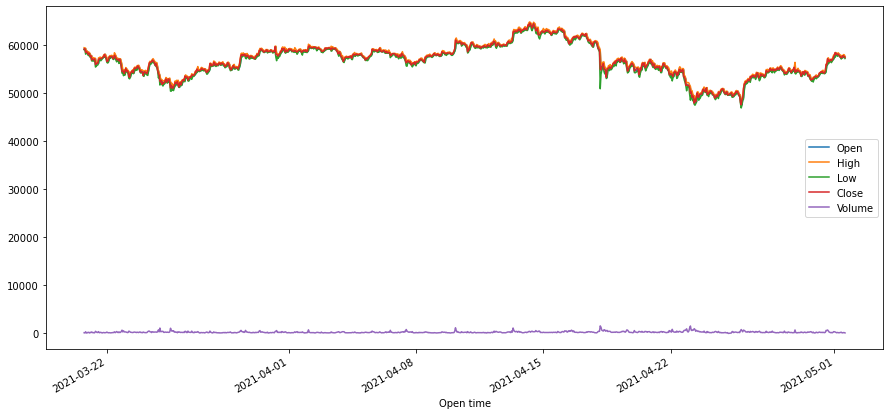

In [6]:
historical_price = pd.read_json(r_historical_price.text)

del_columns = historical_price.iloc[:,6:]
historical_price = historical_price.drop(del_columns, axis=1)
historical_price = historical_price.rename(columns={0:'Open time', 1:'Open', 2:'High', 3:'Low', 4:'Close', 5:'Volume'})
historical_price['Open time'] = pd.to_datetime(historical_price['Open time'], unit="ms")
historical_price = historical_price.set_index('Open time')

plot_price = historical_price.copy()
plot_price['Volume'] = plot_price['Volume']/10
plot_price.plot(figsize=(15,7))

historical_price

In [7]:
close_predict = historical_price.copy()

close_predict['close_3'] = close_predict['Close'].rolling(window=3).mean()
close_predict['close_9'] = close_predict['Close'].rolling(window=9).mean()
close_predict['next_day_close_price'] = close_predict['Close'].shift(-1)
close_predict = close_predict.dropna()

close_predict

,Open,High,Low,Close,Volume,close_3,close_9,next_day_close_price
Open time,,,,,,,,
2021-03-21 02:00:00,58179.99,58180.00,57480.00,57615.32,2283.571093,58042.250000,58491.832222,57790.00
2021-03-21 03:00:00,57615.33,57856.42,57363.07,57790.00,1761.747020,57861.773333,58338.162222,56909.83
2021-03-21 04:00:00,57790.00,57797.45,56717.81,56909.83,3073.168352,57438.383333,58075.607778,57129.99
2021-03-21 05:00:00,56911.99,57242.59,56856.66,57129.99,1641.059369,57276.606667,57921.180000,57047.98
2021-03-21 06:00:00,57130.00,57413.66,56668.00,57047.98,1874.113922,57029.266667,57734.426667,56972.68
...,...,...,...,...,...,...,...,...
2021-05-01 09:00:00,57450.63,57851.35,57116.16,57492.99,2610.647916,57556.253333,57942.127778,57384.00
2021-05-01 10:00:00,57492.99,57666.66,57335.75,57384.00,1270.119787,57442.540000,57823.683333,57816.90
2021-05-01 11:00:00,57384.00,57834.37,57383.33,57816.90,1245.516229,57564.630000,57792.227778,57764.15


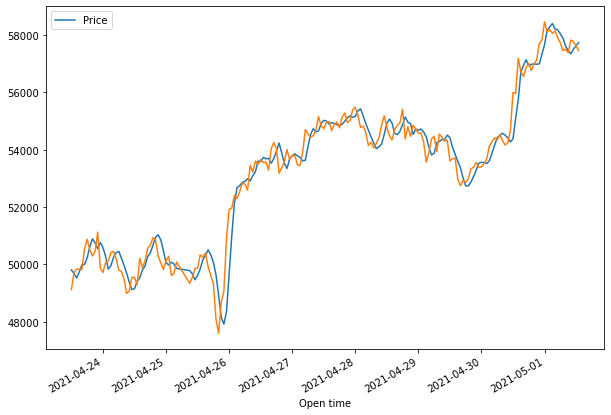

Predict score: 95.89
Crypto Price (y) = 1.24 * 3 Days Moving Average (x1) + -0.25 * 9 Days Moving Average (x2) + 676.87 (constant)


In [8]:
X = close_predict[['close_3', 'close_9']]

y = close_predict['next_day_close_price']

t = 0.8
t = int(t*len(historical_price))
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

model = LinearRegression()
model.fit(X_train, y_train)

predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['Price'])

predicted_price.plot(figsize=(10,7))
y_test.plot()
plt.show()

score = model.score(X[t:], y[t:])*100
print(f"Predict score: {float(score.round(2))}" )

print(f"Crypto Price (y) = {model.coef_[0].round(2)} * 3 Days Moving Average (x1) \
+ {model.coef_[1].round(2)} * 9 Days Moving Average (x2) \
+ {model.intercept_.round(2)} (constant)")

In [9]:
close_predict = historical_price.copy()

close_predict['close_3'] = close_predict['Close'].rolling(window=3).mean()
close_predict['close_9'] = close_predict['Close'].rolling(window=9).mean()
close_predict = close_predict.dropna()

close_predict['predicted_crypto_price'] = model.predict(close_predict[['close_3', 'close_9']])

close_predict.tail()

,Open,High,Low,Close,Volume,close_3,close_9,predicted_crypto_price
Open time,,,,,,,,
2021-05-01 10:00:00,57492.99,57666.66,57335.75,57384.00,1270.119787,57442.540000,57823.683333,57338.290147
2021-05-01 11:00:00,57384.00,57834.37,57383.33,57816.90,1245.516229,57564.630000,57792.227778,57497.083702
2021-05-01 12:00:00,57816.91,58043.01,57673.00,57764.15,1804.406449,57655.016667,57746.170000,57620.302416
2021-05-01 13:00:00,57764.15,58005.09,57525.00,57611.00,1688.842880,57730.683333,57697.128889,57726.059975
2021-05-01 14:00:00,57613.10,57681.00,57220.67,57449.98,1058.534769,57608.376667,57621.077778,57593.718346


In [10]:
mean_predict = historical_price[['Open', 'High', 'Low', 'Close']].copy()

mean_predict['mean'] = 0

for i in range(len(mean_predict)):
    mean_predict['mean'].iloc[i] = mean_predict.iloc[i].mean()
mean_predict['next_day_price'] = mean_predict['mean'].shift(-1)
mean_predict = mean_predict.dropna()

mean_predict


C:\Users\Windows 10\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Open,High,Low,Close,mean,next_day_price
Open time,,,,,,
2021-03-20 18:00:00,59138.43,59474.89,59104.28,59173.03,47378.126,47401.094
2021-03-20 19:00:00,59173.03,59424.73,59134.89,59272.82,47401.094,47061.184
2021-03-20 20:00:00,59272.83,59381.70,58131.55,58519.84,47061.184,46880.462
2021-03-20 21:00:00,58519.77,58782.77,58371.01,58728.76,46880.462,46880.482
2021-03-20 22:00:00,58728.75,58800.00,58370.65,58503.01,46880.482,46619.620
...,...,...,...,...,...,...
2021-05-01 09:00:00,57450.63,57851.35,57116.16,57492.99,45982.226,45975.880
2021-05-01 10:00:00,57492.99,57666.66,57335.75,57384.00,45975.880,46083.720
2021-05-01 11:00:00,57384.00,57834.37,57383.33,57816.90,46083.720,46259.414


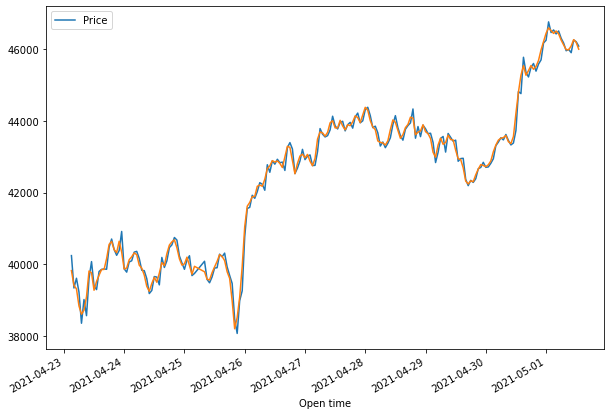

Predict score: 99.31


In [11]:
X = mean_predict[['Open', 'High', 'Low', 'Close']]
y = mean_predict['next_day_price']

t = 0.8
t = int(t*len(mean_predict))

X_train = X[:t]
y_train = y[:t]

X_test = X[t:]
y_test = y[t:]

model = LinearRegression()
model.fit(X_train, y_train)

predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['Price'])

predicted_price.plot(figsize=(10,7))
y_test.plot()
plt.show()

score = model.score(X[t:], y[t:])*100
print(f"Predict score: {float(score.round(2))}" )

In [12]:
mean_predict = historical_price.copy()

mean_predict = mean_predict.iloc[:,0:4]
mean_predict['mean'] = 0

for i in range(len(mean_predict)):
    mean_predict['mean'].iloc[i] = mean_predict.iloc[i,:4].mean()
    
mean_predict = mean_predict.dropna()
mean_predict['predicted_crypto_price'] = model.predict(mean_predict[['Open', 'High', 'Low', 'Close']])
mean_predict.tail()

C:\Users\Windows 10\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Open,High,Low,Close,mean,predicted_crypto_price
Open time,,,,,,
2021-05-01 10:00:00,57492.99,57666.66,57335.75,57384.00,57469.8500,45896.297331
2021-05-01 11:00:00,57384.00,57834.37,57383.33,57816.90,57604.6500,46250.293198
2021-05-01 12:00:00,57816.91,58043.01,57673.00,57764.15,57824.2675,46201.566831
2021-05-01 13:00:00,57764.15,58005.09,57525.00,57611.00,57726.3100,46079.167186
2021-05-01 14:00:00,57613.10,57681.00,57220.67,57449.98,57491.1875,45940.433485


In [13]:
close_predict.tail()

,Open,High,Low,Close,Volume,close_3,close_9,predicted_crypto_price
Open time,,,,,,,,
2021-05-01 10:00:00,57492.99,57666.66,57335.75,57384.00,1270.119787,57442.540000,57823.683333,57338.290147
2021-05-01 11:00:00,57384.00,57834.37,57383.33,57816.90,1245.516229,57564.630000,57792.227778,57497.083702
2021-05-01 12:00:00,57816.91,58043.01,57673.00,57764.15,1804.406449,57655.016667,57746.170000,57620.302416
2021-05-01 13:00:00,57764.15,58005.09,57525.00,57611.00,1688.842880,57730.683333,57697.128889,57726.059975
2021-05-01 14:00:00,57613.10,57681.00,57220.67,57449.98,1058.534769,57608.376667,57621.077778,57593.718346


In [14]:
mean_predict['move'] = np.where(
    mean_predict['predicted_crypto_price'].shift(1) < mean_predict['predicted_crypto_price'], "Buy", "Stay"
)
mean_predict.tail(1)

,Open,High,Low,Close,mean,predicted_crypto_price,move
Open time,,,,,,,
2021-05-01 14:00:00,57613.1,57681.0,57220.67,57449.98,57491.1875,45940.433485,Stay


In [16]:
money = 10 
money_spend = 0
buys = 0
bought_coins = 0
for i in range(len(mean_predict)):
    if mean_predict['move'].iloc[i] == 'Buy':
        buys +=1
        bought_coins += money / mean_predict['mean'].iloc[i]
        money_spend += money


coin_price = mean_predict['mean'].iloc[-1]

print(f"Buys number: {buys}\nBought coins: {bought_coins}\nMoney spend: {money_spend}\nCurrent coin price: {coin_price}")
print()
fortune = bought_coins*coin_price
print(f'Fortune: {fortune.round(2)}\nProfit: {(fortune-money_spend).round(2)}')

Buys number: 496
Bought coins: 0.08792229718307461
Money spend: 4960
Current coin price: 57491.18750000001

Fortune: 5054.76
Profit: 94.76


In [17]:
money = 10
money_spend = 0
buys = 0
sales = 0
bought_coins = 0
for i in range(len(mean_predict)):
    if mean_predict['move'].iloc[i] == 'Buy':
        buys += 1
        bought_coins += money / mean_predict['mean'].iloc[i]
        money_spend += money
    else:
        sales += 1
        bought_coins -= money / mean_predict['mean'].iloc[i]
        money_spend -= money 

coin_price = mean_predict['mean'].iloc[-1]

print(f"Buys number: {buys}\nSales numebr: {sales}\nBuyed coins: {bought_coins}\nMoney spend: {money_spend}\nCurrent coin price: {coin_price}")
print()
fortune = buyed_coins*coin_price
print(f'Fortune: {fortune.round(2)}\nProfit: {(fortune-money_spend).round(2)}')

Buys number: 496
Sales numebr: 504
Buyed coins: -0.000856228107919939
Money spend: -80
Current coin price: 57491.18750000001



NameError: name 'buyed_coins' is not defined

In [18]:
def buys_sales_simulator_df(money_buys=10, money_sales=10):
    money_spend = 0
    buys = 0
    bought_coins = 0
    sales = 0
    for i in range(len(mean_predict)):
        if mean_predict['move'].iloc[i] == 'Buy':
            buys +=1
            bought_coins += money_buys / mean_predict['mean'].iloc[i]
            money_spend += money_buys
        else:
            sales += 1
            bought_coins -= money_sales / mean_predict['mean'].iloc[i]
            money_spend -= money_sales 
    coin_price = mean_predict['mean'].iloc[-1]
    fortune = (bought_coins * coin_price).round(2)
    profit = (fortune - money_spend).round(2)
    df = pd.DataFrame(data={
        'Money for buys': money_buys,
        'Money for sales': money_sales,
        'Buys number': buys,
        'Sales number': sales,
        'Bought coins': bought_coins,
        'Money spend': money_spend,
        'Current coin price': coin_price,
        'Fortune': fortune,
        'profit': profit,
    }, index=[0])
    return df

In [19]:
buys_sales_simulator_df(10,10)

,Money for buys,Money for sales,Buys number,Sales number,Bought coins,Money spend,Current coin price,Fortune,profit
0,10,10,496,504,-0.000856,-80,57491.1875,-49.23,30.77


In [22]:
# df = pd.DataFrame(data=buys_sales_simulator_df(1,1))
# for i in range(1,101):
#     for j in range(101):
#         df = df.append(pd.DataFrame(data=buys_sales_simulator_df(i,j)))
# df = df.reset_index()
# df = df.drop([0])
# df = df.drop('index', axis=1)
# df.to_csv('buys_sales_simulation_df_BTCUSDT_1h.csv', index=False)
# df

,Money for buys,Money for sales,Buys number,Sales number,Bought coins,Money spend,Current coin price,Fortune,profit
1,1,0,496,504,0.008792,496,57491.1875,505.48,9.48
2,1,1,496,504,-0.000086,-8,57491.1875,-4.92,3.08
3,1,2,496,504,-0.008963,-512,57491.1875,-515.32,-3.32
4,1,3,496,504,-0.017841,-1016,57491.1875,-1025.72,-9.72
5,1,4,496,504,-0.026719,-1520,57491.1875,-1536.12,-16.12
...,...,...,...,...,...,...,...,...,...
10096,100,96,496,504,0.026949,1216,57491.1875,1549.34,333.34
10097,100,97,496,504,0.018071,712,57491.1875,1038.94,326.94
10098,100,98,496,504,0.009193,208,57491.1875,528.54,320.54
10099,100,99,496,504,0.000316,-296,57491.1875,18.14,314.14


In [28]:
df = pd.read_csv('buys_sales_simulation_df_BTCUSDT_1d.csv')
df

,Money for buys,Money for sales,Buys number,Sales number,Bought coins,Money spend,Current coin price,Fortune,profit
0,1,0,543,457,0.067324,543,57758.7625,3888.55,3345.55
1,1,1,543,457,0.009625,86,57758.7625,555.90,469.90
2,1,2,543,457,-0.048075,-371,57758.7625,-2776.75,-2405.75
3,1,3,543,457,-0.105774,-828,57758.7625,-6109.40,-5281.40
4,1,4,543,457,-0.163474,-1285,57758.7625,-9442.05,-8157.05
...,...,...,...,...,...,...,...,...,...
10095,100,96,543,457,1.193250,10428,57758.7625,68920.63,58492.63
10096,100,97,543,457,1.135550,9971,57758.7625,65587.98,55616.98
10097,100,98,543,457,1.077851,9514,57758.7625,62255.33,52741.33
10098,100,99,543,457,1.020151,9057,57758.7625,58922.68,49865.68


In [29]:
df.loc[df['profit'] == df['profit'].max()]

,Money for buys,Money for sales,Buys number,Sales number,Bought coins,Money spend,Current coin price,Fortune,profit
9999,100,0,543,457,6.732396,54300,57758.7625,388854.88,334554.88
